In [110]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
df= pd.read_csv('adult.csv')
pd.options.display.max_columns = 1000
df.tail(5)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Never-worked,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Never-worked,186061,Some-college,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [101]:
df2=df[['fnlwgt','education.num']]
df2=df2.head(50)
df2

,fnlwgt,education.num
0,77053,9
1,132870,9
2,186061,10
3,140359,4
4,264663,10
5,216864,9
6,150601,6
7,88638,16
8,422013,9
9,70037,10


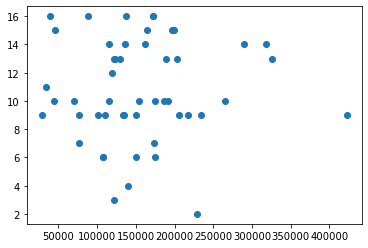

In [102]:
plt.scatter(df2['fnlwgt'],df2['education.num'])

In [103]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [106]:
y_predicted = km.fit_predict(df2)
y_predicted

array([1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 0, 0])

In [108]:
df2['cluster']=y_predicted
df2.head(5)

,fnlwgt,education.num,cluster
0,77053,9,1
1,132870,9,1
2,186061,10,0
3,140359,4,1
4,264663,10,2


In [113]:
scaler = MinMaxScaler()

scaler.fit(df2[['fnlwgt']])
df2['fnlwgt'] = scaler.transform(df2[['fnlwgt']])

scaler.fit(df2[['education.num']])
df2['education.num'] = scaler.transform(df2[['education.num']])

df2.head(5)

,fnlwgt,education.num,cluster
0,0.122136,0.500000,1
1,0.264181,0.500000,1
2,0.399543,0.571429,0
3,0.283239,0.142857,1
4,0.599571,0.571429,2


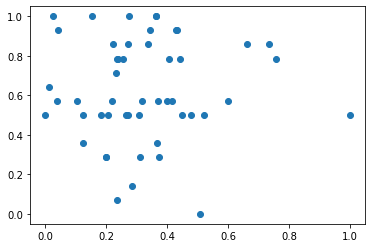

In [124]:
plt.scatter(df2.fnlwgt,df2['education.num'])

In [121]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df2[['fnlwgt','education.num']])
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 0])

In [122]:
km.cluster_centers_

array([[0.26940624, 0.43386243],
       [0.75078966, 0.71428571],
       [0.28151302, 0.88492063]])

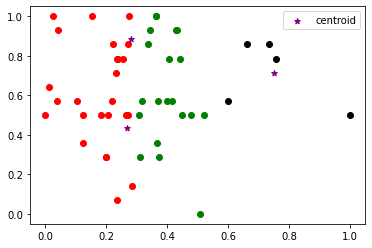

In [126]:
dfa = df2[df2.cluster==0]
dfb = df2[df2.cluster==1]
dfc = df2[df2.cluster==2]
plt.scatter(dfa.fnlwgt,dfa['education.num'],color='green')
plt.scatter(dfb.fnlwgt,dfb['education.num'],color='red')
plt.scatter(dfc.fnlwgt,dfc['education.num'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()